In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import sys
import math
import seaborn as sns
import datetime
import random
import numpy as np


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import mean_squared_error

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.cluster import KMeans, DBSCAN





random.seed(10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Read data: test and training
#data_input_test = pd.read_csv("/content/drive/MyDrive/Master Semester Project/data/input_test.csv.gz")

In [3]:
data_input_training = pd.read_csv("/content/drive/MyDrive/Master Semester Project/data/input_training.csv.gz", compression='gzip')

In [4]:
data_output_training=pd.read_csv("/content/drive/MyDrive/Master Semester Project/data/output_training_IxKGwDV.csv")

In [5]:
target=data_output_training.target

In [6]:
# merging both output and input for train
df_train=pd.merge(data_input_training,data_output_training)
df_train

,ID,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,...,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV,target
0,148,360,0,0.000000,0.000000,0.000000,0.000000,0.029317,0.000000,0.000000,...,0.015771,0.009462,0.012697,0.019507,0.005101,0.010654,0.006971,-2.307230,0.646580,-3.403606
1,149,360,1,0.000000,0.000000,0.000000,0.022056,0.000000,0.036711,0.000000,...,0.006589,0.005276,0.011648,0.011829,0.015558,0.001788,0.005251,-2.263960,0.487708,-2.904798
2,150,360,2,0.000000,0.000000,0.000000,0.000000,0.022267,0.000000,0.029678,...,0.020972,0.012728,0.007921,0.000643,0.029692,0.016440,0.011970,-2.343106,0.544476,-2.337807
3,151,360,3,0.000000,0.007384,0.000000,0.000000,0.000000,0.007417,0.000000,...,0.020397,0.016834,0.031869,0.012468,0.065173,0.048286,0.021237,-2.331621,0.633181,-2.285676
4,152,360,4,0.088086,0.109737,0.000000,0.014648,0.003662,0.036627,0.007319,...,0.013394,0.009415,0.024983,0.019524,0.018342,0.008442,0.012525,-2.415575,0.880580,-2.606321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684477,1536855,596,800,1.125704,0.865801,0.000000,0.124611,0.124456,0.000000,0.062344,...,0.014019,0.019868,NaN,0.024631,0.006000,0.001502,0.024601,-2.933123,-1.488287,-1.691818
684478,1536856,596,801,0.000000,0.746269,0.502197,0.441640,0.000000,0.125392,0.187852,...,0.007037,0.017105,0.001438,0.023558,NaN,0.019984,0.001676,-3.221969,-1.450029,-2.389487
684479,1536857,596,802,1.086262,0.000000,0.568900,0.471846,0.189753,0.475285,0.441362,...,0.017401,0.014552,0.016174,0.020105,0.037890,0.028302,0.028835,-3.292824,-1.375085,-1.426908
684480,1536858,596,803,1.505646,0.000000,2.157360,1.556420,2.305665,0.515132,NaN,...,0.011664,0.003293,0.010009,0.021838,0.021954,0.014121,0.031530,-2.915789,-1.099627,-1.510139


In [ ]:
# getting the volume from the target
#df_train["volume_end_of_day"]=np.exp(df_train["target"])

In [7]:
df_by_stock=df_train. groupby("pid").mean()
df_by_stock=df_by_stock.drop(columns=["ID"])

In [8]:
df_by_stock

,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,...,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV,target
pid,,,,,,,,,,,,,,,,,,,,,
0,401.738750,0.288322,0.206616,0.140124,0.116835,0.103753,0.098022,0.093835,0.085793,0.082560,...,0.017442,0.016695,0.016526,0.017600,0.017664,0.017966,0.018362,-3.689620,0.023667,-1.926426
1,402.160848,0.284284,0.269782,0.205134,0.180851,0.139645,0.150508,0.142867,0.128652,0.108380,...,0.018144,0.017968,0.015872,0.017255,0.016886,0.016976,0.017786,-1.884990,-0.538420,-1.928885
2,402.160848,0.252045,0.196082,0.162868,0.150725,0.131223,0.119278,0.128418,0.107645,0.100695,...,0.016054,0.014827,0.015166,0.015451,0.014859,0.015423,0.016167,-4.158781,1.068051,-1.937951
3,401.953808,0.516375,0.373456,0.292148,0.279744,0.235092,0.231633,0.217442,0.196825,0.187201,...,0.015124,0.014432,0.014083,0.014245,0.013902,0.014463,0.015528,-4.207635,0.459831,-2.183468
4,401.738750,0.308597,0.298345,0.205655,0.186259,0.166207,0.147963,0.139317,0.124821,0.121010,...,0.018195,0.018128,0.017311,0.017425,0.016895,0.018302,0.019495,-3.417994,-1.094031,-1.276023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,402.160848,0.431027,0.441198,0.304632,0.299454,0.247419,0.234887,0.237890,0.205426,0.188667,...,0.017991,0.016686,0.016434,0.015908,0.016091,0.016663,0.017304,-2.743723,-0.508560,-1.735501
896,401.738750,0.368189,0.263276,0.211542,0.187122,0.171790,0.160185,0.147969,0.143747,0.134718,...,0.015578,0.015027,0.014354,0.014911,0.014521,0.014665,0.016148,-3.662916,1.058074,-2.123501
897,401.637046,0.373967,0.258015,0.222189,0.193612,0.174310,0.157097,0.168686,0.153832,0.147033,...,0.014420,0.013596,0.013029,0.012899,0.012592,0.013046,0.013474,-4.593619,1.381932,-1.998296


In [9]:
df_by_stock.fillna(0, inplace = True)

In [10]:
x = df_by_stock.iloc[:,1:]
x

,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,abs_ret9,...,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV,target
pid,,,,,,,,,,,,,,,,,,,,,
0,0.288322,0.206616,0.140124,0.116835,0.103753,0.098022,0.093835,0.085793,0.082560,0.075889,...,0.017442,0.016695,0.016526,0.017600,0.017664,0.017966,0.018362,-3.689620,0.023667,-1.926426
1,0.284284,0.269782,0.205134,0.180851,0.139645,0.150508,0.142867,0.128652,0.108380,0.114725,...,0.018144,0.017968,0.015872,0.017255,0.016886,0.016976,0.017786,-1.884990,-0.538420,-1.928885
2,0.252045,0.196082,0.162868,0.150725,0.131223,0.119278,0.128418,0.107645,0.100695,0.105906,...,0.016054,0.014827,0.015166,0.015451,0.014859,0.015423,0.016167,-4.158781,1.068051,-1.937951
3,0.516375,0.373456,0.292148,0.279744,0.235092,0.231633,0.217442,0.196825,0.187201,0.183723,...,0.015124,0.014432,0.014083,0.014245,0.013902,0.014463,0.015528,-4.207635,0.459831,-2.183468
4,0.308597,0.298345,0.205655,0.186259,0.166207,0.147963,0.139317,0.124821,0.121010,0.117247,...,0.018195,0.018128,0.017311,0.017425,0.016895,0.018302,0.019495,-3.417994,-1.094031,-1.276023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.431027,0.441198,0.304632,0.299454,0.247419,0.234887,0.237890,0.205426,0.188667,0.183784,...,0.017991,0.016686,0.016434,0.015908,0.016091,0.016663,0.017304,-2.743723,-0.508560,-1.735501
896,0.368189,0.263276,0.211542,0.187122,0.171790,0.160185,0.147969,0.143747,0.134718,0.121691,...,0.015578,0.015027,0.014354,0.014911,0.014521,0.014665,0.016148,-3.662916,1.058074,-2.123501
897,0.373967,0.258015,0.222189,0.193612,0.174310,0.157097,0.168686,0.153832,0.147033,0.132840,...,0.014420,0.013596,0.013029,0.012899,0.012592,0.013046,0.013474,-4.593619,1.381932,-1.998296


https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6

https://365datascience.com/tutorials/python-tutorials/pca-k-means/

In [11]:
# standardise the data:
scaler = StandardScaler()
segmentation_std= scaler.fit_transform(x)

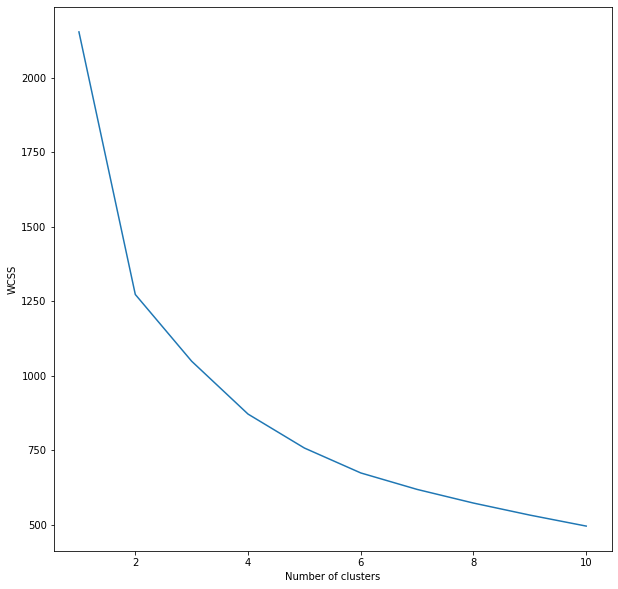

In [ ]:
# without PCA
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(x)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# moving to PCA
pca = PCA()
data = pca.fit_transform(segmentation_std)

In [ ]:
# ratio:
pca.explained_variance_ratio_

array([4.84925253e-01, 3.59853717e-01, 7.70570785e-02, 1.29440645e-02,
       8.42672833e-03, 6.15153268e-03, 4.95489895e-03, 3.71412275e-03,
       2.86577707e-03, 2.53413349e-03, 2.12851823e-03, 1.77963380e-03,
       1.63061254e-03, 1.52516008e-03, 1.25563861e-03, 1.17506463e-03,
       1.08172482e-03, 9.82440475e-04, 9.13963626e-04, 8.55941693e-04,
       8.22381832e-04, 7.19233085e-04, 7.04400993e-04, 6.70364042e-04,
       6.30145753e-04, 6.13102146e-04, 5.97793751e-04, 5.72998279e-04,
       5.60936236e-04, 5.38308774e-04, 5.22802886e-04, 5.13022641e-04,
       4.98963422e-04, 4.80321933e-04, 4.60650394e-04, 4.49543647e-04,
       4.30529002e-04, 4.15072958e-04, 4.00892002e-04, 3.94222245e-04,
       3.84427025e-04, 3.73563714e-04, 3.70218359e-04, 3.62808421e-04,
       3.55617372e-04, 3.34313152e-04, 3.28905716e-04, 3.17980545e-04,
       3.10130691e-04, 3.02651698e-04, 2.99437628e-04, 2.90990171e-04,
       2.70603716e-04, 2.69010813e-04, 2.53073112e-04, 2.46954885e-04,
      

In [ ]:
pca.explained_variance_ratio_[0:7]

array([0.48492525, 0.35985372, 0.07705708, 0.01294406, 0.00842673,
       0.00615153, 0.0049549 ])

Text(0, 0.5, 'Cumulative Explained Variance')

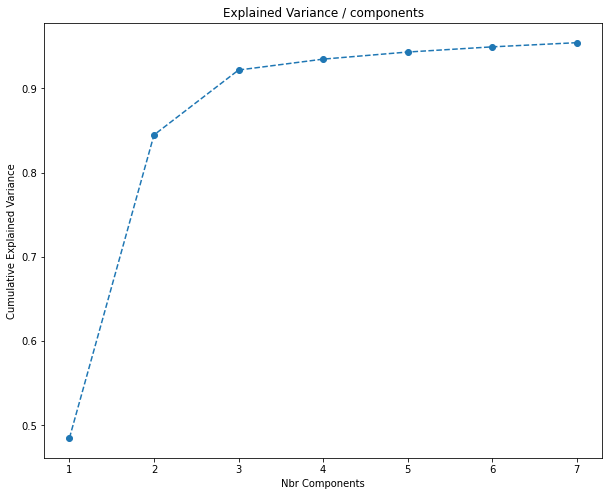

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,8), pca.explained_variance_ratio_[0:7].cumsum(), marker = 'o', linestyle='--')
plt.title("Explained Variance / components")
plt.xlabel("Nbr Components")
plt.ylabel('Cumulative Explained Variance')

In [ ]:
# the rule of thumb is to keep around 80%, which we alreadu get by the two first components, 
# I ll keep the 3 first since after that we kind of 100% of it

pca=PCA()
pca.fit(segmentation_std)

PCA()

In [ ]:
# now to get the scores:
score_pca= pca.transform(segmentation_std)
score_pca


array([[-9.82684737e+00,  5.91225537e-01, -1.39604500e+00, ...,
         8.91623693e-04, -1.83561863e-02, -1.20577519e-01],
       [-4.38563802e+00,  4.29671287e+00, -1.47093177e+00, ...,
        -6.74909545e-02,  8.60201850e-02, -1.79688281e-02],
       [-7.23257054e+00, -9.89785424e-01,  3.36421280e-01, ...,
        -5.21162086e-02,  1.05508334e-02, -4.30650397e-03],
       ...,
       [-3.92181828e+00, -4.78992476e+00,  4.60444912e+00, ...,
        -2.63042420e-02, -1.53649238e-02,  6.46685169e-03],
       [-6.93608690e+00,  1.09114017e+00, -4.31610167e+00, ...,
         3.55991720e-02, -4.88343497e-02,  6.11390617e-02],
       [ 1.90389401e+00, -1.66757324e-01, -1.52142822e+00, ...,
        -6.07116435e-02,  1.24361435e-01, -5.41413886e-03]])

In [ ]:
score_pca.shape

(900, 125)

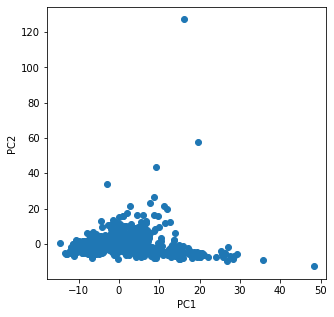

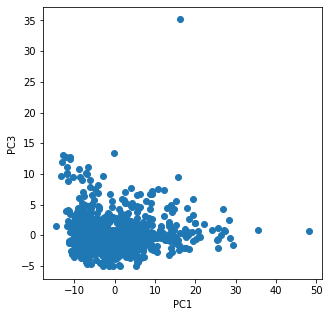

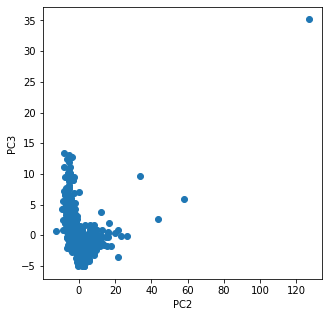

In [ ]:
# visualisation:

plt.figure(figsize=(5,5))
plt.scatter(score_pca[:,0],score_pca[:,1] )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.figure(figsize=(5,5))
plt.scatter(score_pca[:,0],score_pca[:,2] )
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.show()

plt.figure(figsize=(5,5))
plt.scatter(score_pca[:,1],score_pca[:,2] )
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

In [ ]:
# now moving to the clustering
wcss = []
for i in range(1,21):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(score_pca)
   wcss.append(model.inertia_)


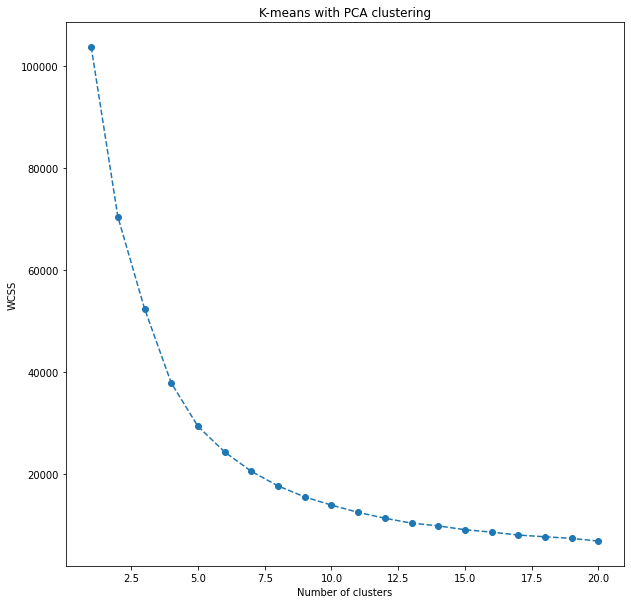

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(1,21), wcss,marker = 'o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA clustering')
plt.show()

In [ ]:
# I keep 5

In [ ]:
kmeans_pca= KMeans(n_clusters=5, init= "k-means++", random_state=42)

In [ ]:
kmeans_pca.fit(score_pca)

KMeans(n_clusters=5, random_state=42)

In [ ]:
score_pca.shape

(900, 3)

In [ ]:
# now we analyse the result

# create a new data frame withtht orginal data + pca scores + assigned clusters

df_segm_pca_kmeans=pd.concat([x, pd.DataFrame(score_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3:]=['Comp1','Comp2','Comp3']

#labels
df_segm_pca_kmeans['clusters']=kmeans_pca.labels_

In [ ]:
df_segm_pca_kmeans.head()

,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,abs_ret9,...,rel_vol58,rel_vol59,rel_vol60,LS,NLV,target,Comp1,Comp2,Comp3,clusters
0,0.288322,0.206616,0.140124,0.116835,0.103753,0.098022,0.093835,0.085793,0.082560,0.075889,...,0.017664,0.017966,0.018362,-3.689620,0.023667,-1.926426,-9.826847,0.591226,-1.396045,1
1,0.284284,0.269782,0.205134,0.180851,0.139645,0.150508,0.142867,0.128652,0.108380,0.114725,...,0.016886,0.016976,0.017786,-1.884990,-0.538420,-1.928885,-4.385638,4.296713,-1.470932,1
2,0.252045,0.196082,0.162868,0.150725,0.131223,0.119278,0.128418,0.107645,0.100695,0.105906,...,0.014859,0.015423,0.016167,-4.158781,1.068051,-1.937951,-7.232571,-0.989785,0.336421,1
3,0.516375,0.373456,0.292148,0.279744,0.235092,0.231633,0.217442,0.196825,0.187201,0.183723,...,0.013902,0.014463,0.015528,-4.207635,0.459831,-2.183468,1.921906,-2.729430,1.065639,3
4,0.308597,0.298345,0.205655,0.186259,0.166207,0.147963,0.139317,0.124821,0.121010,0.117247,...,0.016895,0.018302,0.019495,-3.417994,-1.094031,-1.276023,-4.785706,1.777593,-3.226008,1


In [ ]:
df_segm_pca_kmeans['Segments']=df_segm_pca_kmeans['clusters'].map({0: 'first',1: 'second',2: 'third',3: 'fourth',4: 'fifth' })

In [ ]:
df_segm_pca_kmeans.head()

,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,abs_ret9,...,rel_vol59,rel_vol60,LS,NLV,target,Comp1,Comp2,Comp3,clusters,Segments
0,0.288322,0.206616,0.140124,0.116835,0.103753,0.098022,0.093835,0.085793,0.082560,0.075889,...,0.017966,0.018362,-3.689620,0.023667,-1.926426,-9.826847,0.591226,-1.396045,1,second
1,0.284284,0.269782,0.205134,0.180851,0.139645,0.150508,0.142867,0.128652,0.108380,0.114725,...,0.016976,0.017786,-1.884990,-0.538420,-1.928885,-4.385638,4.296713,-1.470932,1,second
2,0.252045,0.196082,0.162868,0.150725,0.131223,0.119278,0.128418,0.107645,0.100695,0.105906,...,0.015423,0.016167,-4.158781,1.068051,-1.937951,-7.232571,-0.989785,0.336421,1,second
3,0.516375,0.373456,0.292148,0.279744,0.235092,0.231633,0.217442,0.196825,0.187201,0.183723,...,0.014463,0.015528,-4.207635,0.459831,-2.183468,1.921906,-2.729430,1.065639,3,fourth
4,0.308597,0.298345,0.205655,0.186259,0.166207,0.147963,0.139317,0.124821,0.121010,0.117247,...,0.018302,0.019495,-3.417994,-1.094031,-1.276023,-4.785706,1.777593,-3.226008,1,second


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


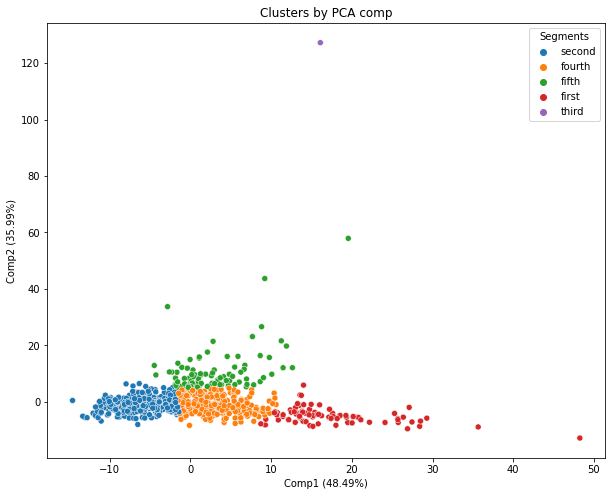

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


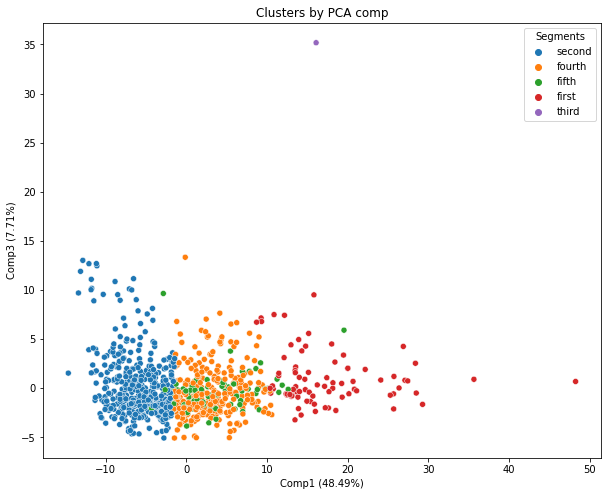

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


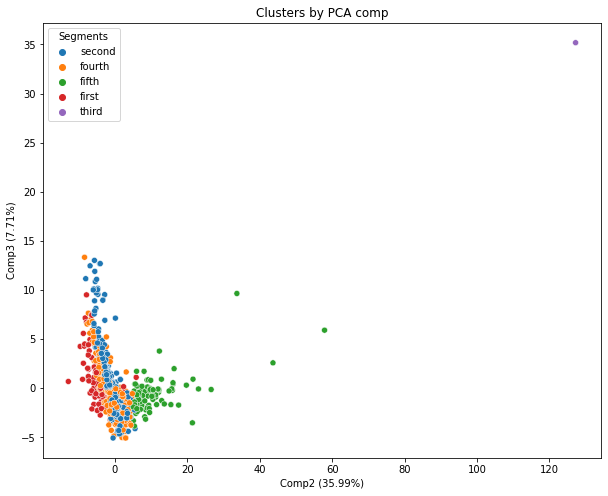

In [ ]:
# Visualising:

# by pca 

x_axis=df_segm_pca_kmeans['Comp1']
y_axis=df_segm_pca_kmeans['Comp2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Segments'])
plt.title('Clusters by PCA comp')
plt.xlabel('Comp1 ('+ str(round(pca.explained_variance_ratio_[0]*100, 2) )+ '%)')
plt.ylabel('Comp2 ('+ str(round(pca.explained_variance_ratio_[1]*100, 2) )+ '%)')
plt.show()

x_axis=df_segm_pca_kmeans['Comp1']
y_axis=df_segm_pca_kmeans['Comp3']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Segments'])
plt.title('Clusters by PCA comp')
plt.xlabel('Comp1 ('+ str(round(pca.explained_variance_ratio_[0]*100, 2) )+ '%)')
plt.ylabel('Comp3 ('+ str(round(pca.explained_variance_ratio_[2]*100, 2) )+ '%)')
plt.show()

x_axis=df_segm_pca_kmeans['Comp2']
y_axis=df_segm_pca_kmeans['Comp3']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Segments'])
plt.title('Clusters by PCA comp')
plt.xlabel('Comp2 ('+ str(round(pca.explained_variance_ratio_[1]*100, 2) )+ '%)')
plt.ylabel('Comp3 ('+ str(round(pca.explained_variance_ratio_[2]*100, 2) )+ '%)')
plt.show()


In [ ]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "colab"

fig = px.scatter_3d(df_segm_pca_kmeans, x='Comp1', y='Comp2', z='Comp3',
              color='Segments')
fig.show()

In [ ]:
# I keep 4

In [18]:
pca=PCA(3)
pca.fit(segmentation_std)
score_pca= pca.transform(segmentation_std)
score_pca

array([[-9.82684737,  0.59122554, -1.396045  ],
       [-4.38563802,  4.29671287, -1.47093177],
       [-7.23257054, -0.98978542,  0.33642128],
       ...,
       [-3.92181828, -4.78992476,  4.60444912],
       [-6.9360869 ,  1.09114017, -4.31610167],
       [ 1.90389401, -0.16675732, -1.52142822]])

In [19]:
kmeans_pca= KMeans(n_clusters=4, init= "k-means++", random_state=42)

In [20]:
df_by_stock.iloc[:,0:125]

,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,...,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV
pid,,,,,,,,,,,,,,,,,,,,,
0,401.738750,0.288322,0.206616,0.140124,0.116835,0.103753,0.098022,0.093835,0.085793,0.082560,...,0.015094,0.017442,0.016695,0.016526,0.017600,0.017664,0.017966,0.018362,-3.689620,0.023667
1,402.160848,0.284284,0.269782,0.205134,0.180851,0.139645,0.150508,0.142867,0.128652,0.108380,...,0.016244,0.018144,0.017968,0.015872,0.017255,0.016886,0.016976,0.017786,-1.884990,-0.538420
2,402.160848,0.252045,0.196082,0.162868,0.150725,0.131223,0.119278,0.128418,0.107645,0.100695,...,0.013384,0.016054,0.014827,0.015166,0.015451,0.014859,0.015423,0.016167,-4.158781,1.068051
3,401.953808,0.516375,0.373456,0.292148,0.279744,0.235092,0.231633,0.217442,0.196825,0.187201,...,0.013389,0.015124,0.014432,0.014083,0.014245,0.013902,0.014463,0.015528,-4.207635,0.459831
4,401.738750,0.308597,0.298345,0.205655,0.186259,0.166207,0.147963,0.139317,0.124821,0.121010,...,0.016658,0.018195,0.018128,0.017311,0.017425,0.016895,0.018302,0.019495,-3.417994,-1.094031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,402.160848,0.431027,0.441198,0.304632,0.299454,0.247419,0.234887,0.237890,0.205426,0.188667,...,0.014440,0.017991,0.016686,0.016434,0.015908,0.016091,0.016663,0.017304,-2.743723,-0.508560
896,401.738750,0.368189,0.263276,0.211542,0.187122,0.171790,0.160185,0.147969,0.143747,0.134718,...,0.013734,0.015578,0.015027,0.014354,0.014911,0.014521,0.014665,0.016148,-3.662916,1.058074
897,401.637046,0.373967,0.258015,0.222189,0.193612,0.174310,0.157097,0.168686,0.153832,0.147033,...,0.011760,0.014420,0.013596,0.013029,0.012899,0.012592,0.013046,0.013474,-4.593619,1.381932


In [21]:
get_weights=pd.DataFrame(pca.components_)
get_weights.columns= df_by_stock.iloc[:,0:125].columns
get_weights=get_weights.transpose()
get_weights

,0,1,2
day,0.116682,-0.036491,-0.017130
abs_ret0,0.120315,-0.017232,-0.048561
abs_ret1,0.123903,-0.017673,-0.020267
abs_ret2,0.124411,-0.025366,-0.005024
abs_ret3,0.125282,-0.021584,-0.001128
...,...,...,...
rel_vol58,0.014709,0.135888,-0.074801
rel_vol59,0.007213,0.133843,-0.104416
rel_vol60,0.034854,0.083479,-0.076702
LS,-0.036566,-0.065306,0.145748


In [22]:
get_weights

,0,1,2
day,0.116682,-0.036491,-0.017130
abs_ret0,0.120315,-0.017232,-0.048561
abs_ret1,0.123903,-0.017673,-0.020267
abs_ret2,0.124411,-0.025366,-0.005024
abs_ret3,0.125282,-0.021584,-0.001128
...,...,...,...
rel_vol58,0.014709,0.135888,-0.074801
rel_vol59,0.007213,0.133843,-0.104416
rel_vol60,0.034854,0.083479,-0.076702
LS,-0.036566,-0.065306,0.145748


In [37]:
abs(get_weights.iloc[:,0]).sort_values(ascending=False)[0:15].index

Index(['abs_ret40', 'abs_ret33', 'abs_ret28', 'abs_ret48', 'abs_ret39',
       'abs_ret36', 'abs_ret43', 'abs_ret34', 'abs_ret41', 'abs_ret31',
       'abs_ret47', 'abs_ret38', 'abs_ret51', 'abs_ret50', 'abs_ret37'],
      dtype='object')

In [38]:
get_weights.loc[abs(get_weights.iloc[:,0]).sort_values(ascending=False)[0:15].index]

,0,1,2
abs_ret40,0.126680,-0.015428,-0.008273
abs_ret33,0.126490,-0.018836,-0.006320
abs_ret28,0.126436,-0.019798,-0.005664
abs_ret48,0.126415,-0.017484,-0.010594
abs_ret39,0.126295,-0.018181,-0.011294
abs_ret36,0.126280,-0.020116,-0.007627
abs_ret43,0.126233,-0.018748,-0.008502
abs_ret34,0.126224,-0.020124,-0.008671
abs_ret41,0.126193,-0.019977,-0.011239
abs_ret31,0.126150,-0.020680,-0.007779


In [34]:
abs(get_weights.iloc[:,1]).sort_values(ascending=False)[0:15]

rel_vol35    0.141182
rel_vol33    0.140955
rel_vol51    0.140853
rel_vol30    0.140624
rel_vol29    0.140382
rel_vol31    0.140335
rel_vol44    0.140256
rel_vol52    0.139767
rel_vol43    0.139688
rel_vol42    0.139434
rel_vol49    0.139364
rel_vol41    0.139322
rel_vol39    0.138958
rel_vol37    0.138727
rel_vol32    0.138537
Name: 1, dtype: float64

In [39]:
get_weights.loc[abs(get_weights.iloc[:,1]).sort_values(ascending=False)[0:15].index]

,0,1,2
rel_vol35,0.026853,0.141182,-0.019447
rel_vol33,0.029644,0.140955,-0.022544
rel_vol51,0.020846,0.140853,-0.046475
rel_vol30,0.030438,0.140624,-0.018462
rel_vol29,0.028978,0.140382,-0.023621
rel_vol31,0.031880,0.140335,-0.016106
rel_vol44,0.025346,0.140256,-0.046619
rel_vol52,0.022794,0.139767,-0.047099
rel_vol43,0.025522,0.139688,-0.051925
rel_vol42,0.024668,0.139434,-0.054700


In [35]:
abs(get_weights.iloc[:,2]).sort_values(ascending=False)[0:15]

rel_vol1     0.296991
rel_vol2     0.294241
rel_vol3     0.280590
rel_vol0     0.279307
rel_vol4     0.279259
rel_vol5     0.253673
rel_vol7     0.213172
rel_vol6     0.209495
NLV          0.177905
rel_vol8     0.177426
abs_ret60    0.161034
LS           0.145748
rel_vol9     0.143272
rel_vol10    0.135548
rel_vol11    0.126515
Name: 2, dtype: float64

In [40]:
get_weights.loc[abs(get_weights.iloc[:,2]).sort_values(ascending=False)[0:15].index]

,0,1,2
rel_vol1,0.002410,0.000462,0.296991
rel_vol2,0.009440,0.031080,0.294241
rel_vol3,0.017423,0.048872,0.280590
rel_vol0,-0.007536,-0.022369,0.279307
rel_vol4,0.023724,0.046035,0.279259
rel_vol5,0.010268,0.072129,0.253673
rel_vol7,0.028632,0.093019,0.213172
rel_vol6,0.030057,0.092466,0.209495
NLV,-0.035536,0.057725,-0.177905
rel_vol8,0.031967,0.109141,0.177426


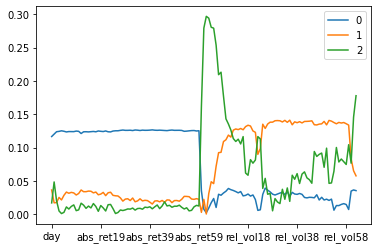

In [23]:
lines = abs(get_weights).plot.line()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4702f818d0>,
      dtype=object)

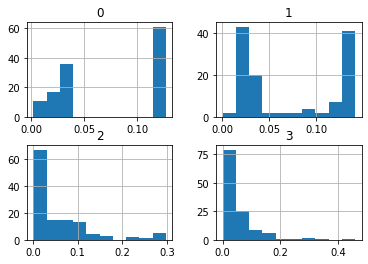

In [ ]:
abs(get_weights).hist()

In [ ]:
kmeans_pca.fit(score_pca)

KMeans(n_clusters=4, random_state=42)

In [ ]:
pca.components_*np.sqrt(pca.explained_variance_)

ValueError: ignored

In [ ]:
score_pca.shape

(900, 4)

In [ ]:
# now we analyse the result

# create a new data frame withtht orginal data + pca scores + assigned clusters

df_segm_pca_kmeans=pd.concat([x, pd.DataFrame(score_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3:]=['Comp1','Comp2','Comp3']

#labels
df_segm_pca_kmeans['clusters']=kmeans_pca.labels_

In [ ]:
df_segm_pca_kmeans.head()

,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,abs_ret9,...,rel_vol58,rel_vol59,rel_vol60,LS,NLV,target,Comp1,Comp2,Comp3,clusters
0,0.288322,0.206616,0.140124,0.116835,0.103753,0.098022,0.093835,0.085793,0.082560,0.075889,...,0.017664,0.017966,0.018362,-3.689620,0.023667,-1.926426,-9.826847,0.591226,-1.396045,0
1,0.284284,0.269782,0.205134,0.180851,0.139645,0.150508,0.142867,0.128652,0.108380,0.114725,...,0.016886,0.016976,0.017786,-1.884990,-0.538420,-1.928885,-4.385638,4.296713,-1.470932,0
2,0.252045,0.196082,0.162868,0.150725,0.131223,0.119278,0.128418,0.107645,0.100695,0.105906,...,0.014859,0.015423,0.016167,-4.158781,1.068051,-1.937951,-7.232571,-0.989785,0.336421,0
3,0.516375,0.373456,0.292148,0.279744,0.235092,0.231633,0.217442,0.196825,0.187201,0.183723,...,0.013902,0.014463,0.015528,-4.207635,0.459831,-2.183468,1.921906,-2.729430,1.065639,1
4,0.308597,0.298345,0.205655,0.186259,0.166207,0.147963,0.139317,0.124821,0.121010,0.117247,...,0.016895,0.018302,0.019495,-3.417994,-1.094031,-1.276023,-4.785706,1.777593,-3.226008,0


In [ ]:
df_segm_pca_kmeans['Segments']=df_segm_pca_kmeans['clusters'].map({0: 'first',1: 'second',2: 'third',3: 'fourth',4: 'fifth' })

In [ ]:
df_segm_pca_kmeans.head()

,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,abs_ret9,...,rel_vol59,rel_vol60,LS,NLV,target,Comp1,Comp2,Comp3,clusters,Segments
0,0.288322,0.206616,0.140124,0.116835,0.103753,0.098022,0.093835,0.085793,0.082560,0.075889,...,0.017966,0.018362,-3.689620,0.023667,-1.926426,-9.826847,0.591226,-1.396045,0,first
1,0.284284,0.269782,0.205134,0.180851,0.139645,0.150508,0.142867,0.128652,0.108380,0.114725,...,0.016976,0.017786,-1.884990,-0.538420,-1.928885,-4.385638,4.296713,-1.470932,0,first
2,0.252045,0.196082,0.162868,0.150725,0.131223,0.119278,0.128418,0.107645,0.100695,0.105906,...,0.015423,0.016167,-4.158781,1.068051,-1.937951,-7.232571,-0.989785,0.336421,0,first
3,0.516375,0.373456,0.292148,0.279744,0.235092,0.231633,0.217442,0.196825,0.187201,0.183723,...,0.014463,0.015528,-4.207635,0.459831,-2.183468,1.921906,-2.729430,1.065639,1,second
4,0.308597,0.298345,0.205655,0.186259,0.166207,0.147963,0.139317,0.124821,0.121010,0.117247,...,0.018302,0.019495,-3.417994,-1.094031,-1.276023,-4.785706,1.777593,-3.226008,0,first


In [ ]:
round(pca.explained_variance_ratio_[0]*100, 2) 

48.49

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



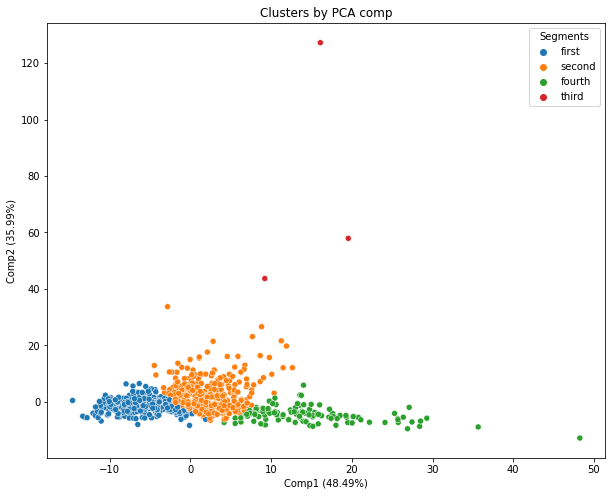

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



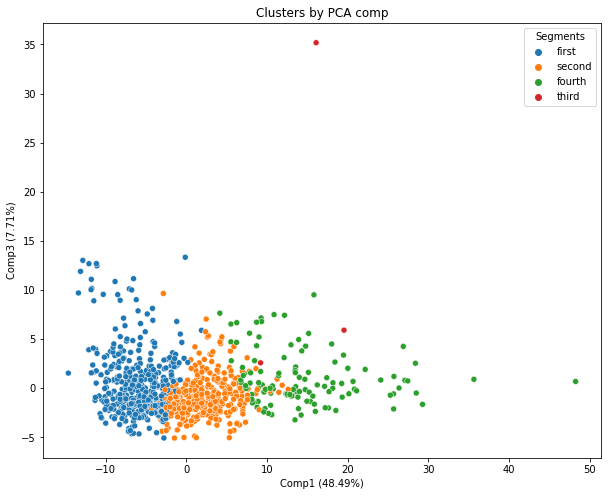

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



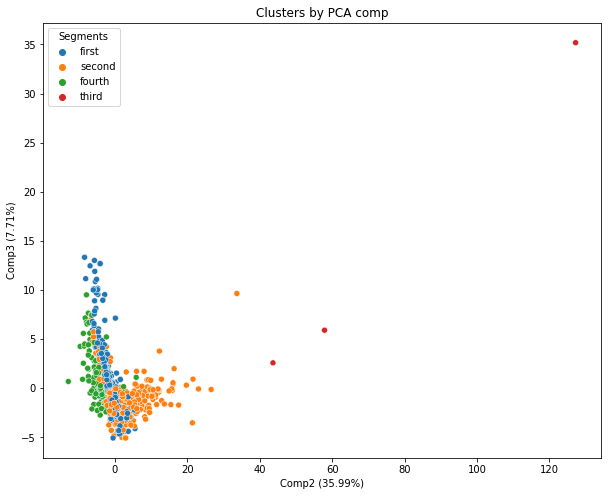

In [ ]:
# Visualising:

# by pca 

x_axis=df_segm_pca_kmeans['Comp1']
y_axis=df_segm_pca_kmeans['Comp2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Segments'])
plt.title('Clusters by PCA comp')
plt.xlabel('Comp1 ('+ str(round(pca.explained_variance_ratio_[0]*100, 2) )+ '%)')
plt.ylabel('Comp2 ('+ str(round(pca.explained_variance_ratio_[1]*100, 2) )+ '%)')
plt.show()

x_axis=df_segm_pca_kmeans['Comp1']
y_axis=df_segm_pca_kmeans['Comp3']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Segments'])
plt.title('Clusters by PCA comp')
plt.xlabel('Comp1 ('+ str(round(pca.explained_variance_ratio_[0]*100, 2) )+ '%)')
plt.ylabel('Comp3 ('+ str(round(pca.explained_variance_ratio_[2]*100, 2) )+ '%)')
plt.show()

x_axis=df_segm_pca_kmeans['Comp2']
y_axis=df_segm_pca_kmeans['Comp3']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Segments'])
plt.title('Clusters by PCA comp')
plt.xlabel('Comp2 ('+ str(round(pca.explained_variance_ratio_[1]*100, 2) )+ '%)')
plt.ylabel('Comp3 ('+ str(round(pca.explained_variance_ratio_[2]*100, 2) )+ '%)')
plt.show()


In [ ]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "colab"

fig = px.scatter_3d(df_segm_pca_kmeans, x='Comp1', y='Comp2', z='Comp3',
              color='Segments')
fig.show()

In [ ]:
df_segm_pca_kmeans[['Comp1', 'Comp2', 'Comp3', 'clusters', 'Segments']]

,Comp1,Comp2,Comp3,clusters,Segments
0,-9.826847,0.591226,-1.396045,0,first
1,-4.385638,4.296713,-1.470932,0,first
2,-7.232571,-0.989785,0.336421,0,first
3,1.921906,-2.729430,1.065639,1,second
4,-4.785706,1.777593,-3.226008,0,first
...,...,...,...,...,...
895,2.994358,-0.969718,-1.673964,1,second
896,-4.680149,-2.280728,1.372815,0,first
897,-3.921818,-4.789925,4.604449,0,first
898,-6.936087,1.091140,-4.316102,0,first


In [ ]:
data_input_training

,ID,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,...,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV
0,148,360,0,0.000000,0.000000,0.000000,0.000000,0.029317,0.000000,0.000000,...,0.004521,0.015771,0.009462,0.012697,0.019507,0.005101,0.010654,0.006971,-2.307230,0.646580
1,149,360,1,0.000000,0.000000,0.000000,0.022056,0.000000,0.036711,0.000000,...,0.008817,0.006589,0.005276,0.011648,0.011829,0.015558,0.001788,0.005251,-2.263960,0.487708
2,150,360,2,0.000000,0.000000,0.000000,0.000000,0.022267,0.000000,0.029678,...,0.018640,0.020972,0.012728,0.007921,0.000643,0.029692,0.016440,0.011970,-2.343106,0.544476
3,151,360,3,0.000000,0.007384,0.000000,0.000000,0.000000,0.007417,0.000000,...,0.013628,0.020397,0.016834,0.031869,0.012468,0.065173,0.048286,0.021237,-2.331621,0.633181
4,152,360,4,0.088086,0.109737,0.000000,0.014648,0.003662,0.036627,0.007319,...,0.008228,0.013394,0.009415,0.024983,0.019524,0.018342,0.008442,0.012525,-2.415575,0.880580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684477,1536855,596,800,1.125704,0.865801,0.000000,0.124611,0.124456,0.000000,0.062344,...,0.001501,0.014019,0.019868,NaN,0.024631,0.006000,0.001502,0.024601,-2.933123,-1.488287
684478,1536856,596,801,0.000000,0.746269,0.502197,0.441640,0.000000,0.125392,0.187852,...,0.005607,0.007037,0.017105,0.001438,0.023558,NaN,0.019984,0.001676,-3.221969,-1.450029
684479,1536857,596,802,1.086262,0.000000,0.568900,0.471846,0.189753,0.475285,0.441362,...,0.012104,0.017401,0.014552,0.016174,0.020105,0.037890,0.028302,0.028835,-3.292824,-1.375085
684480,1536858,596,803,1.505646,0.000000,2.157360,1.556420,2.305665,0.515132,NaN,...,0.013435,0.011664,0.003293,0.010009,0.021838,0.021954,0.014121,0.031530,-2.915789,-1.099627


In [ ]:
data_training_clustered=pd.merge(data_input_training,df_segm_pca_kmeans[['Comp1', 'Comp2', 'Comp3', 'clusters', 'Segments']], left_on = 'pid',right_index=True )
data_training_clustered.head()

,ID,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,...,rel_vol58,rel_vol59,rel_vol60,LS,NLV,Comp1,Comp2,Comp3,clusters,Segments
0,148,360,0,0.000000,0.000000,0.0,0.000000,0.029317,0.000000,0.000000,...,0.005101,0.010654,0.006971,-2.307230,0.646580,-5.616549,-0.203534,-0.907914,0,first
1,149,360,1,0.000000,0.000000,0.0,0.022056,0.000000,0.036711,0.000000,...,0.015558,0.001788,0.005251,-2.263960,0.487708,-5.616549,-0.203534,-0.907914,0,first
2,150,360,2,0.000000,0.000000,0.0,0.000000,0.022267,0.000000,0.029678,...,0.029692,0.016440,0.011970,-2.343106,0.544476,-5.616549,-0.203534,-0.907914,0,first
3,151,360,3,0.000000,0.007384,0.0,0.000000,0.000000,0.007417,0.000000,...,0.065173,0.048286,0.021237,-2.331621,0.633181,-5.616549,-0.203534,-0.907914,0,first
4,152,360,4,0.088086,0.109737,0.0,0.014648,0.003662,0.036627,0.007319,...,0.018342,0.008442,0.012525,-2.415575,0.880580,-5.616549,-0.203534,-0.907914,0,first


In [ ]:
data_training_clustered.to_csv("/content/drive/MyDrive/Master Semester Project/data/data_training_clustered.csv.gz", 
           index=False, 
           compression="gzip")

In [ ]:
data_training_clustered.describe()

,ID,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,...,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV,Comp1,Comp2,Comp3,clusters
count,6.844820e+05,684482.000000,684482.000000,679486.000000,656703.000000,657590.000000,662537.000000,660968.000000,657137.000000,664679.000000,...,6.526000e+05,6.530030e+05,6.539240e+05,6.545230e+05,684482.000000,684482.000000,684482.000000,684482.000000,684482.000000,684482.000000
mean,6.862229e+05,449.451723,412.493759,0.397610,0.329012,0.255827,0.229207,0.204163,0.187032,0.188361,...,1.590250e-02,1.580415e-02,1.618791e-02,1.679593e-02,-3.185075,-0.018128,-0.235554,-0.235667,-0.007204,0.785593
std,4.166922e+05,260.605228,231.328674,0.545231,0.420742,0.334599,0.292831,0.261129,0.240466,0.234162,...,1.488205e-02,1.491830e-02,1.495403e-02,1.551244e-02,1.072115,1.002738,7.698243,5.824144,2.988682,0.974127
min,1.480000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.098018e-07,4.569935e-07,7.343371e-07,5.313111e-07,-6.984719,-4.354836,-14.617263,-12.849937,-5.074792,0.000000
25%,3.259202e+05,223.000000,214.000000,0.065317,0.066504,0.051724,0.047877,0.042548,0.037688,0.040551,...,7.835704e-03,7.782268e-03,8.040234e-03,8.348497e-03,-4.113264,-0.814604,-5.815410,-2.966454,-1.967128,0.000000
50%,6.630995e+05,450.000000,419.000000,0.244965,0.204975,0.158479,0.144023,0.128535,0.117270,0.120240,...,1.262340e-02,1.253583e-02,1.289344e-02,1.337526e-02,-3.240612,-0.064327,-1.561587,-0.970238,-0.676970,1.000000
75%,1.006950e+06,676.000000,613.000000,0.538841,0.442478,0.341006,0.305395,0.273262,0.250846,0.253807,...,1.945499e-02,1.929470e-02,1.978127e-02,2.055370e-02,-2.469952,0.731298,3.445872,1.125571,1.094408,1.000000
max,1.536859e+06,899.000000,804.000000,22.816667,16.633565,21.975230,11.778594,19.710468,33.171913,12.693358,...,7.874362e-01,8.171950e-01,6.851355e-01,5.611044e-01,2.763198,4.443585,48.261708,127.235216,35.181989,3.000000


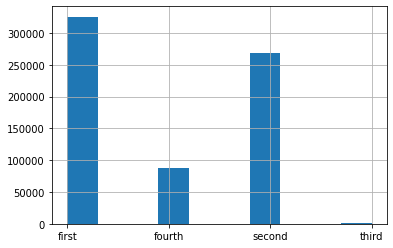

In [ ]:
data_training_clustered.Segments.hist()

In [ ]:
data_training_clustered.Segments.value_counts()/data_training_clustered.shape[0]*100

first     47.540768
second    39.283429
fourth    12.924226
third      0.251577
Name: Segments, dtype: float64

In [ ]:
data_training_clustered.Segments.nunique()

4

In [ ]:
mean_volume_across_day= lambda data_fr: df_train.iloc[:,64:125].mean(axis=1)

data_training_clustered["mean_volume_across_day"]=mean_volume_across_day(df_train)
data_training_clustered

,ID,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,...,rel_vol59,rel_vol60,LS,NLV,Comp1,Comp2,Comp3,clusters,Segments,mean_volume_across_day
0,148,360,0,0.000000,0.000000,0.000000,0.000000,0.029317,0.000000,0.000000,...,0.010654,0.006971,-2.307230,0.646580,-5.616549,-0.203534,-0.907914,0,first,0.016393
1,149,360,1,0.000000,0.000000,0.000000,0.022056,0.000000,0.036711,0.000000,...,0.001788,0.005251,-2.263960,0.487708,-5.616549,-0.203534,-0.907914,0,first,0.016393
2,150,360,2,0.000000,0.000000,0.000000,0.000000,0.022267,0.000000,0.029678,...,0.016440,0.011970,-2.343106,0.544476,-5.616549,-0.203534,-0.907914,0,first,0.016667
3,151,360,3,0.000000,0.007384,0.000000,0.000000,0.000000,0.007417,0.000000,...,0.048286,0.021237,-2.331621,0.633181,-5.616549,-0.203534,-0.907914,0,first,0.016393
4,152,360,4,0.088086,0.109737,0.000000,0.014648,0.003662,0.036627,0.007319,...,0.008442,0.012525,-2.415575,0.880580,-5.616549,-0.203534,-0.907914,0,first,0.016393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678473,1517405,194,800,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.158270,...,0.005814,0.007096,-2.234009,-1.899924,-1.263344,5.504419,0.418218,1,second,0.020000
678474,1517406,194,801,0.000000,0.079893,0.186567,NaN,NaN,0.133014,NaN,...,0.244047,0.219685,-2.239124,-1.328739,-1.263344,5.504419,0.418218,1,second,0.022727
678475,1517407,194,802,0.185480,0.687649,0.612517,0.000000,0.000000,0.040193,0.040209,...,NaN,0.003569,-1.708823,-0.877670,-1.263344,5.504419,0.418218,1,second,0.022222
678476,1517408,194,803,0.162250,NaN,NaN,NaN,0.000000,0.000000,0.135208,...,0.005701,0.017008,-2.134010,-1.799765,-1.263344,5.504419,0.418218,1,second,0.024390


In [ ]:
mean_return_across_day= lambda data_fr: df_train.iloc[:,3:64].mean(axis=1)
data_training_clustered["target"]=target
data_training_clustered["mean_return_across_day"]=mean_return_across_day(df_train)
data_training_clustered

,ID,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,...,LS,NLV,Comp1,Comp2,Comp3,clusters,Segments,mean_volume_across_day,mean_return_across_day,target
0,148,360,0,0.000000,0.000000,0.000000,0.000000,0.029317,0.000000,0.000000,...,-2.307230,0.646580,-5.616549,-0.203534,-0.907914,0,first,0.016393,0.012126,-3.403606
1,149,360,1,0.000000,0.000000,0.000000,0.022056,0.000000,0.036711,0.000000,...,-2.263960,0.487708,-5.616549,-0.203534,-0.907914,0,first,0.016393,0.006403,-2.904798
2,150,360,2,0.000000,0.000000,0.000000,0.000000,0.022267,0.000000,0.029678,...,-2.343106,0.544476,-5.616549,-0.203534,-0.907914,0,first,0.016667,0.012031,-2.337807
3,151,360,3,0.000000,0.007384,0.000000,0.000000,0.000000,0.007417,0.000000,...,-2.331621,0.633181,-5.616549,-0.203534,-0.907914,0,first,0.016393,0.005524,-2.285676
4,152,360,4,0.088086,0.109737,0.000000,0.014648,0.003662,0.036627,0.007319,...,-2.415575,0.880580,-5.616549,-0.203534,-0.907914,0,first,0.016393,0.025009,-2.606321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678473,1517405,194,800,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.158270,...,-2.234009,-1.899924,-1.263344,5.504419,0.418218,1,second,0.020000,0.103827,-0.752275
678474,1517406,194,801,0.000000,0.079893,0.186567,NaN,NaN,0.133014,NaN,...,-2.239124,-1.328739,-1.263344,5.504419,0.418218,1,second,0.022727,0.164695,-2.056921
678475,1517407,194,802,0.185480,0.687649,0.612517,0.000000,0.000000,0.040193,0.040209,...,-1.708823,-0.877670,-1.263344,5.504419,0.418218,1,second,0.022222,0.115762,-2.210324
678476,1517408,194,803,0.162250,NaN,NaN,NaN,0.000000,0.000000,0.135208,...,-2.134010,-1.799765,-1.263344,5.504419,0.418218,1,second,0.024390,0.137567,-0.844661


In [ ]:
data_cluster_1=data_training_clustered[data_training_clustered['Segments']== 'first']
data_cluster_1.describe()

,ID,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,...,rel_vol60,LS,NLV,Comp1,Comp2,Comp3,clusters,mean_volume_across_day,mean_return_across_day,target
count,3.254080e+05,325408.000000,325408.000000,323450.000000,321236.000000,321590.000000,322977.000000,322472.000000,322079.000000,323475.000000,...,319744.000000,325408.000000,325408.000000,325408.000000,325408.000000,325408.000000,325408.0,325408.000000,325408.000000,325408.000000
mean,6.171755e+05,448.905033,405.516908,0.301411,0.233892,0.181017,0.163079,0.144271,0.134091,0.137929,...,0.016287,-3.605684,0.419221,-6.059158,-1.269019,0.463131,0.0,0.016695,0.089442,-1.908770
std,4.021937e+05,263.907932,232.111416,0.379386,0.273145,0.218459,0.183022,0.158592,0.148434,0.149679,...,0.012588,0.893321,0.911186,2.828417,2.171035,3.285589,0.0,0.001136,0.048707,0.883593
min,1.480000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000001,-4.605170,-2.923850,-14.617263,-8.370810,-5.073007,0.0,0.016393,0.000000,-7.137686
25%,2.763728e+05,222.000000,205.000000,0.068259,0.058841,0.045372,0.041876,0.036617,0.033568,0.036193,...,0.009079,-4.428999,-0.242906,-8.037964,-2.605936,-1.778864,0.0,0.016393,0.061784,-2.410391
50%,6.419395e+05,456.000000,408.000000,0.201423,0.159179,0.123385,0.112803,0.099761,0.092512,0.096351,...,0.013678,-3.772908,0.448541,-5.939102,-1.135279,-0.299474,0.0,0.016393,0.083852,-1.883089
75%,9.006022e+05,669.000000,607.000000,0.413403,0.322658,0.249861,0.225734,0.200885,0.186567,0.192019,...,0.020086,-2.987545,1.052512,-3.921818,0.027429,1.805670,0.0,0.016393,0.110705,-1.369831
max,1.532376e+06,898.000000,804.000000,21.275000,12.873202,21.975230,4.807692,4.820479,3.230382,3.425118,...,0.473059,1.351675,4.443585,1.882009,6.441270,13.334317,0.0,0.062500,1.081983,3.580919


In [ ]:
data_cluster_1.target.describe()

count    325408.000000
mean         -1.908770
std           0.883593
min          -7.137686
25%          -2.410391
50%          -1.883089
75%          -1.369831
max           3.580919
Name: target, dtype: float64

In [ ]:
data_cluster_2=data_training_clustered[data_training_clustered['Segments']== 'second']
data_cluster_2.describe()

,ID,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,...,rel_vol60,LS,NLV,Comp1,Comp2,Comp3,clusters,mean_volume_across_day,mean_return_across_day,target
count,2.688880e+05,268888.000000,268888.000000,266424.000000,247896.000000,248447.000000,251624.000000,250697.000000,247417.000000,253177.000000,...,248120.000000,268888.000000,268888.000000,268888.000000,268888.000000,268888.000000,268888.0,268888.000000,268888.000000,268888.000000
mean,7.578810e+05,446.931998,418.457205,0.428275,0.374726,0.288137,0.253532,0.225211,0.202952,0.201494,...,0.017953,-2.688087,-0.546913,1.939326,2.036029,-0.994573,1.0,0.018454,0.134601,-1.861265
std,4.212329e+05,262.422221,230.871207,0.587189,0.458309,0.359059,0.309261,0.272590,0.242575,0.235851,...,0.018740,1.045204,0.883175,2.984820,5.312362,1.967403,0.0,0.004416,0.070736,0.873245
min,5.772000e+03,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000002,-4.605170,-4.354836,-4.490322,-6.559643,-5.074792,1.0,0.016393,0.000000,-6.612961
25%,4.432608e+05,215.000000,222.000000,0.033234,0.063564,0.049691,0.046425,0.041632,0.034235,0.037467,...,0.007544,-3.389430,-1.203657,-0.329619,-1.507391,-2.194446,1.0,0.016393,0.096498,-2.431114
50%,7.623115e+05,439.000000,428.000000,0.269231,0.245600,0.187500,0.167562,0.149813,0.134831,0.135685,...,0.013384,-2.673228,-0.699521,1.608742,0.883272,-1.350754,1.0,0.016949,0.126868,-1.883239
75%,1.039677e+06,680.000000,619.000000,0.612125,0.529801,0.403633,0.354782,0.315891,0.287032,0.285966,...,0.022151,-2.015866,-0.018728,3.852299,4.437854,-0.180299,1.0,0.018868,0.164715,-1.319012
max,1.535867e+06,899.000000,804.000000,22.816667,16.633565,13.743316,10.680824,19.710468,7.033591,9.299811,...,0.561104,2.367489,3.570206,12.634367,33.704290,9.644704,1.0,0.500000,1.367757,3.087144


In [ ]:
data_cluster_2.target.describe()

count    268888.000000
mean         -1.861265
std           0.873245
min          -6.612961
25%          -2.431114
50%          -1.883239
75%          -1.319012
max           3.087144
Name: target, dtype: float64

In [ ]:
data_cluster_3=data_training_clustered[data_training_clustered['Segments']== 'third']
data_cluster_3.describe()

,ID,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,...,rel_vol60,LS,NLV,Comp1,Comp2,Comp3,clusters,mean_volume_across_day,mean_return_across_day,target
count,1.722000e+03,1722.000000,1722.000000,1554.000000,720.000000,679.000000,650.000000,599.000000,626.000000,707.000000,...,727.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.0,1722.000000,1722.000000,1722.000000
mean,8.630102e+05,585.520906,457.509292,0.265862,0.253693,0.242555,0.199442,0.213937,0.189404,0.173918,...,0.037356,0.868749,-1.090148,15.158210,68.847660,11.464041,2.0,0.077975,0.112129,-1.121794
std,4.245387e+05,155.862728,234.352167,0.568729,0.493244,0.529157,0.412577,0.377266,0.367526,0.312875,...,0.060563,0.827004,0.625456,4.549624,32.466651,13.025288,0.0,0.097598,0.110472,1.004024
min,1.624100e+05,411.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000050,-1.410609,-3.467422,9.211572,43.666859,2.582007,2.0,0.016667,0.000000,-3.999427
25%,5.141872e+05,411.000000,283.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001834,0.288874,-1.485650,9.211572,43.666859,2.582007,2.0,0.030303,0.033079,-1.807728
50%,9.315825e+05,665.000000,492.000000,0.000000,0.000000,0.005886,0.000000,0.024291,0.012684,0.018902,...,0.013845,1.004054,-1.058732,16.098027,57.905976,5.907826,2.0,0.045455,0.081747,-1.187171
75%,1.321702e+06,665.000000,660.750000,0.331632,0.302180,0.256909,0.207875,0.264822,0.215170,0.222380,...,0.045354,1.476930,-0.644259,19.555398,57.905976,5.907826,2.0,0.090909,0.155001,-0.520786
max,1.489855e+06,786.000000,804.000000,4.975077,5.087458,5.253736,4.294906,2.683719,3.412525,2.629508,...,0.487119,2.763198,0.566209,19.555398,127.235216,35.181989,2.0,1.000000,0.779431,2.946254


In [ ]:
data_cluster_3.target.describe()

count    1722.000000
mean       -1.121794
std         1.004024
min        -3.999427
25%        -1.807728
50%        -1.187171
75%        -0.520786
max         2.946254
Name: target, dtype: float64

In [ ]:
data_cluster_4=data_training_clustered[data_training_clustered['Segments']== 'fourth']
data_cluster_4.describe()

,ID,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,...,rel_vol60,LS,NLV,Comp1,Comp2,Comp3,clusters,mean_volume_across_day,mean_return_across_day,target
count,8.846400e+04,88464.000000,88464.000000,88058.000000,86851.000000,86874.000000,87286.000000,87200.000000,87015.000000,87320.000000,...,8.593200e+04,88464.000000,88464.000000,88464.000000,88464.000000,88464.000000,88464.0,88464.000000,88464.000000,88464.000000
mean,7.189607e+05,456.472769,419.155306,0.660506,0.550976,0.440458,0.403989,0.365066,0.337709,0.337220,...,1.517420e-02,-3.227409,0.001235,14.275887,-4.684170,1.040541,3.0,0.016941,0.218673,-2.454737
std,4.132706e+05,243.053726,228.964446,0.781070,0.610151,0.492047,0.448903,0.410880,0.391222,0.374477,...,1.368225e-02,0.949292,0.878149,6.878155,2.555904,2.627110,0.0,0.002520,0.121691,0.943258
min,4.440000e+02,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.313111e-07,-6.984719,-3.443364,4.164330,-12.849937,-3.224101,3.0,0.016393,0.000000,-6.589002
25%,3.986848e+05,260.000000,228.000000,0.158479,0.145702,0.113604,0.106724,0.095969,0.086207,0.088261,...,7.691798e-03,-4.010496,-0.680177,9.217624,-6.341584,-0.644195,3.0,0.016393,0.145322,-3.049799
50%,7.241445e+05,464.000000,426.000000,0.451341,0.381518,0.304414,0.278412,0.253565,0.230263,0.232794,...,1.214898e-02,-3.225233,0.005868,13.267547,-4.641238,0.333577,3.0,0.016393,0.198537,-2.475111
75%,1.026137e+06,651.000000,617.000000,0.900901,0.756798,0.605850,0.556133,0.500000,0.462261,0.464253,...,1.851580e-02,-2.606823,0.631309,17.631034,-3.524843,2.029332,3.0,0.016667,0.269080,-1.895070
max,1.536859e+06,884.000000,804.000000,19.895561,12.677538,14.319809,11.778594,17.956989,33.171913,12.693358,...,4.290578e-01,0.739034,3.343179,48.261708,5.891436,9.504608,3.0,0.333333,2.744149,3.244772


In [ ]:
data_cluster_4.target.describe()

count    88464.000000
mean        -2.454737
std          0.943258
min         -6.589002
25%         -3.049799
50%         -2.475111
75%         -1.895070
max          3.244772
Name: target, dtype: float64

# first plot each all cluster individually with all the data together

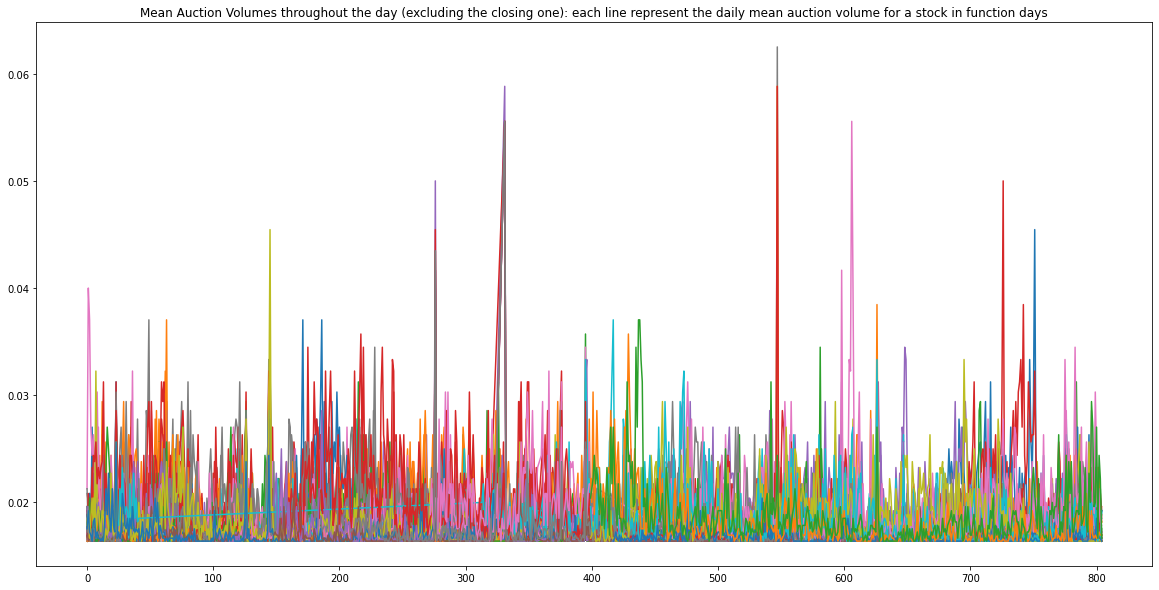

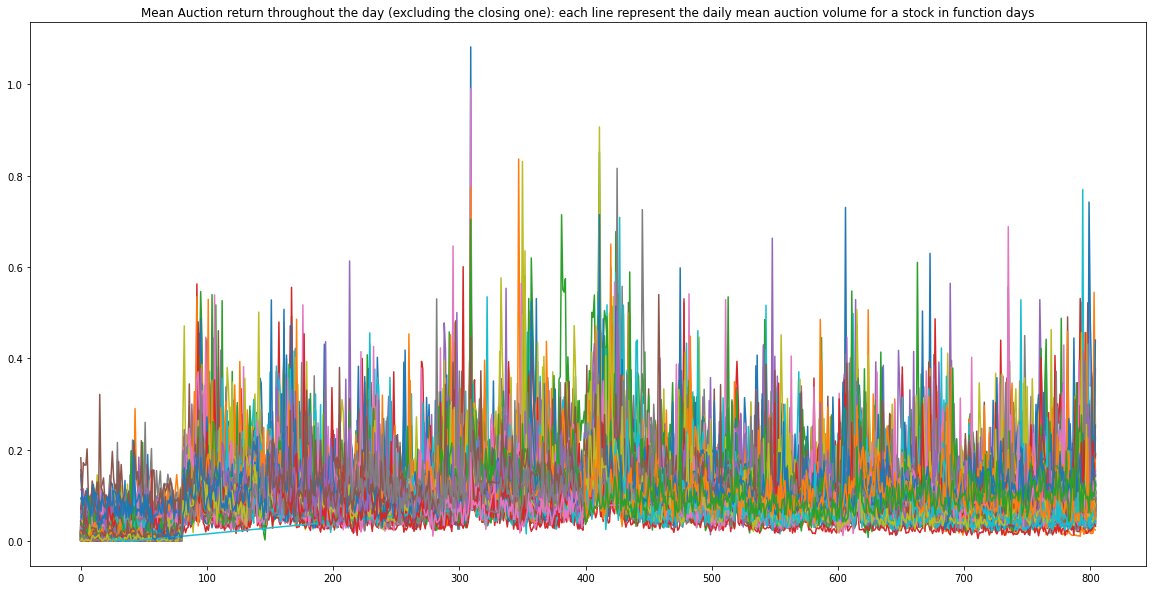

In [ ]:
# cluster 1 



# for volume
for i in data_cluster_1.pid.unique():
  data= data_cluster_1[data_cluster_1["pid"]==i]
  days= data.day
  auction_end_day=data["mean_volume_across_day"]
  plt.rcParams["figure.figsize"] = (20,10)
  plt.plot(days,auction_end_day)
  plt.title("Mean Auction Volumes throughout the day (excluding the closing one): each line represent the daily mean auction volume for a stock in function days")


plt.show()


# for return
for i in data_cluster_1.pid.unique():
  data= data_cluster_1[data_cluster_1["pid"]==i]
  days= data.day
  auction_end_day=data["mean_return_across_day"]
  plt.rcParams["figure.figsize"] = (20,10)
  plt.plot(days,auction_end_day)
  plt.title("Mean Auction return throughout the day (excluding the closing one): each line represent the daily mean auction volume for a stock in function days")


plt.show()


In [ ]:
# cluster 1 



# for volume
for i in data_cluster_1.pid.unique():
  data= data_cluster_1[data_cluster_1["pid"]==i]
  days= data.day
  auction_end_day=data["mean_volume_across_day"]
  plt.rcParams["figure.figsize"] = (20,10)
  plt.plot(days,auction_end_day)
  plt.title("Mean Auction Volumes throughout the day (excluding the closing one): each line represent the daily mean auction volume for a stock in function days")


plt.show()


# for return
for i in data_cluster_1.pid.unique():
  data= data_cluster_1[data_cluster_1["pid"]==i]
  days= data.day
  auction_end_day=data["mean_return_across_day"]
  plt.rcParams["figure.figsize"] = (20,10)
  plt.plot(days,auction_end_day)
  plt.title("Mean Auction return throughout the day (excluding the closing one): each line represent the daily mean auction volume for a stock in function days")


plt.show()

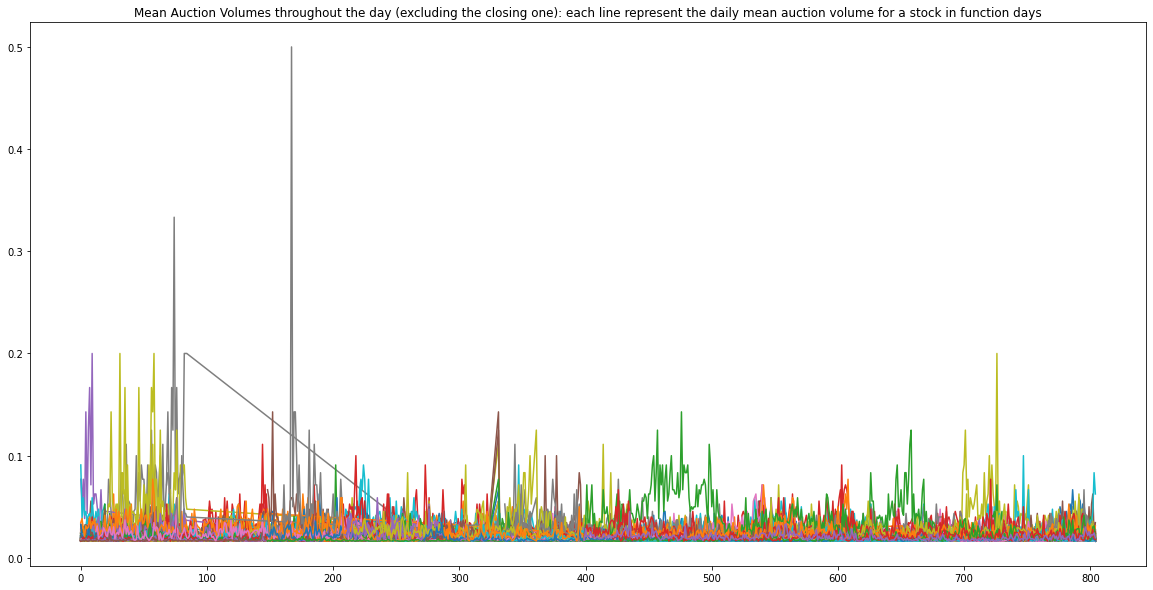

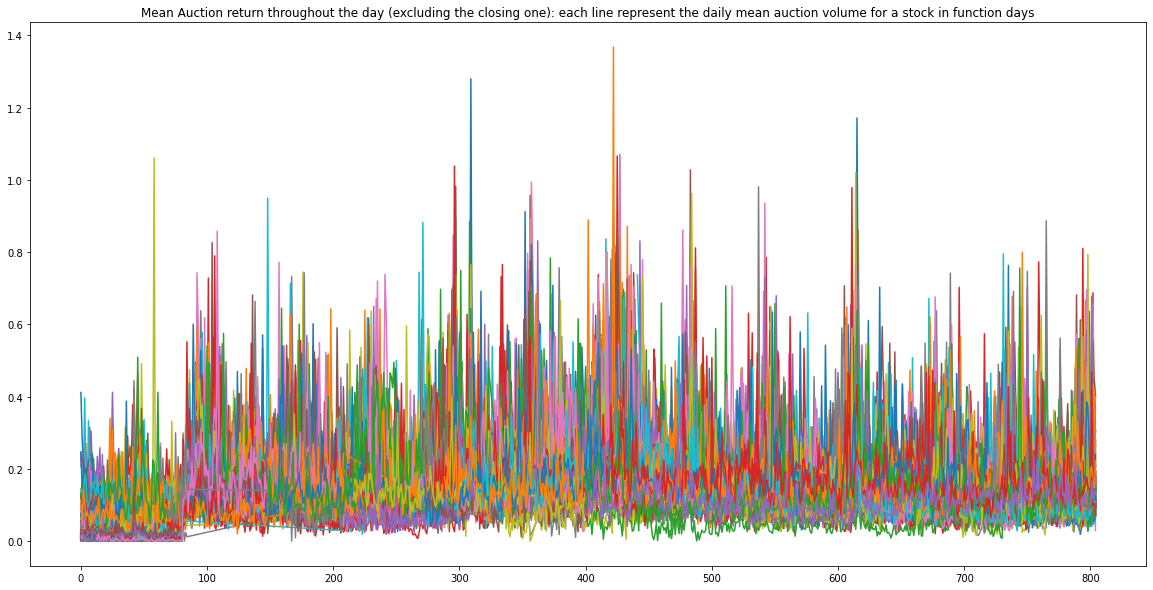

In [ ]:
# cluster 2



# for volume
for i in data_cluster_2.pid.unique():
  data= data_cluster_2[data_cluster_2["pid"]==i]
  days= data.day
  auction_end_day=data["mean_volume_across_day"]
  plt.rcParams["figure.figsize"] = (20,10)
  plt.plot(days,auction_end_day)
  plt.title("Mean Auction Volumes throughout the day (excluding the closing one): each line represent the daily mean auction volume for a stock in function days")


plt.show()


# for return
for i in data_cluster_2.pid.unique():
  data= data_cluster_2[data_cluster_2["pid"]==i]
  days= data.day
  auction_end_day=data["mean_return_across_day"]
  plt.rcParams["figure.figsize"] = (20,10)
  plt.plot(days,auction_end_day)
  plt.title("Mean Auction return throughout the day (excluding the closing one): each line represent the daily mean auction volume for a stock in function days")


plt.show()

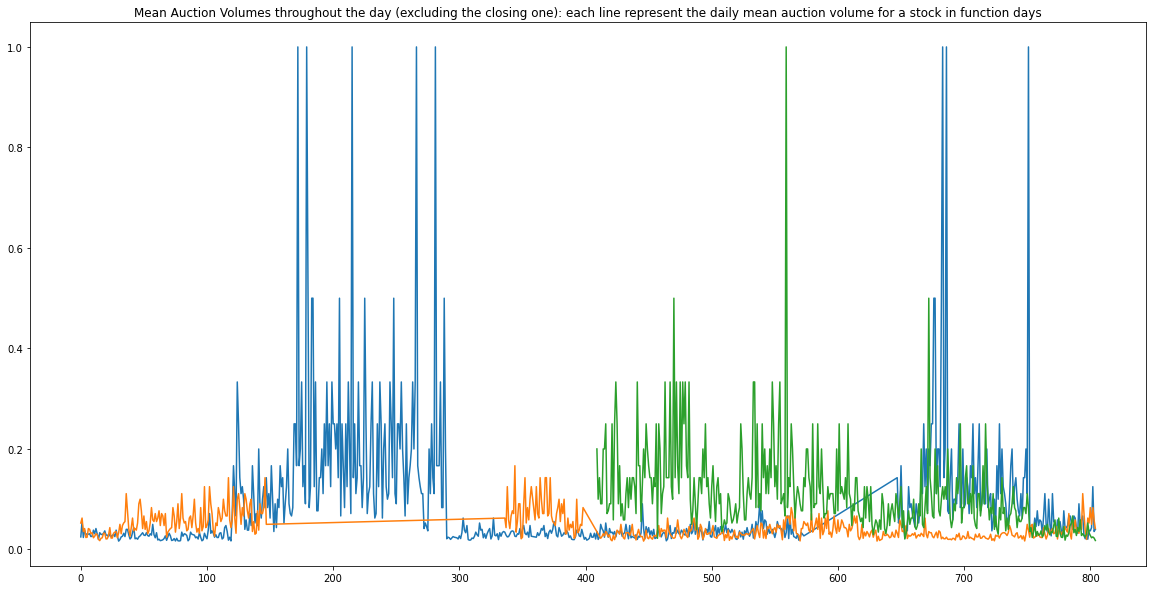

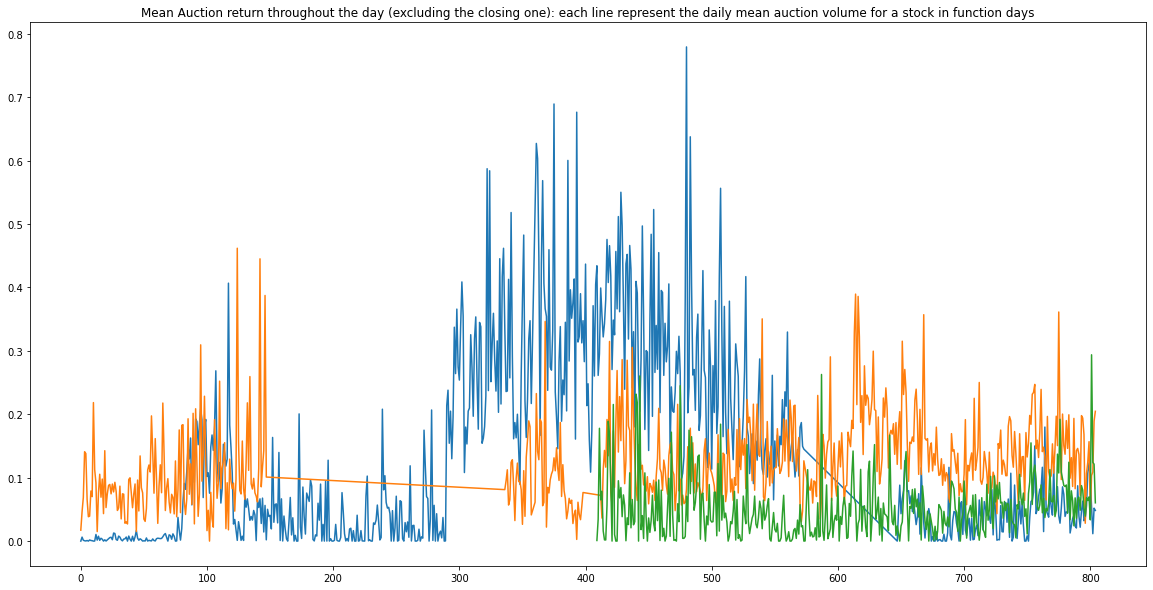

In [ ]:
# cluster 3 



# for volume
for i in data_cluster_3.pid.unique():
  data= data_cluster_3[data_cluster_3["pid"]==i]
  days= data.day
  auction_end_day=data["mean_volume_across_day"]
  plt.rcParams["figure.figsize"] = (20,10)
  plt.plot(days,auction_end_day)
  plt.title("Mean Auction Volumes throughout the day (excluding the closing one): each line represent the daily mean auction volume for a stock in function days")


plt.show()


# for return
for i in data_cluster_3.pid.unique():
  data= data_cluster_3[data_cluster_3["pid"]==i]
  days= data.day
  auction_end_day=data["mean_return_across_day"]
  plt.rcParams["figure.figsize"] = (20,10)
  plt.plot(days,auction_end_day)
  plt.title("Mean Auction return throughout the day (excluding the closing one): each line represent the daily mean auction volume for a stock in function days")


plt.show()

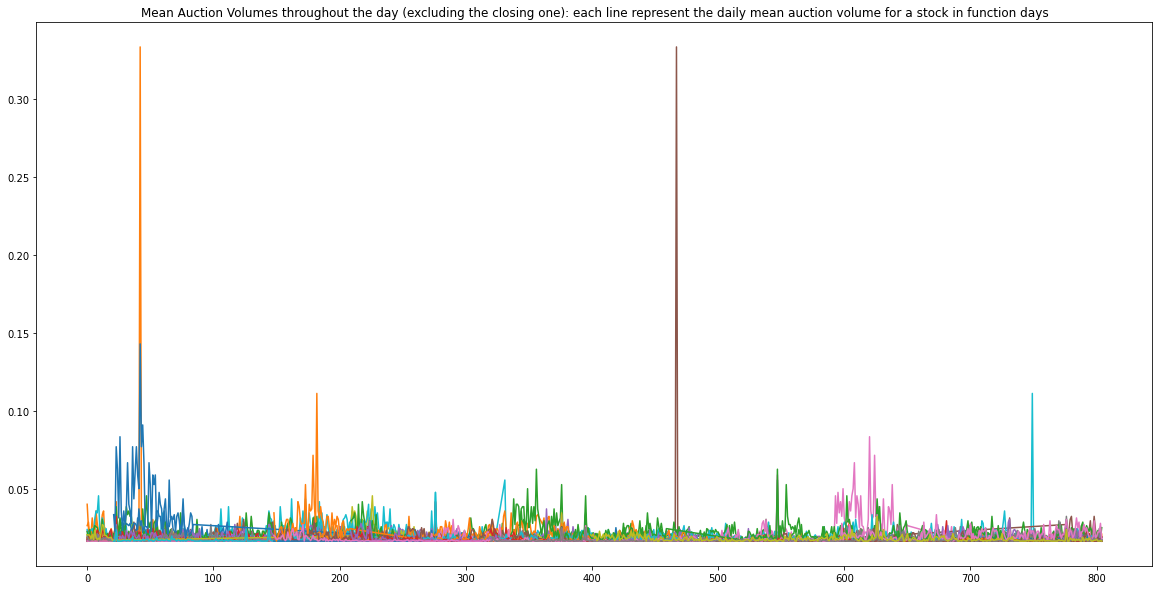

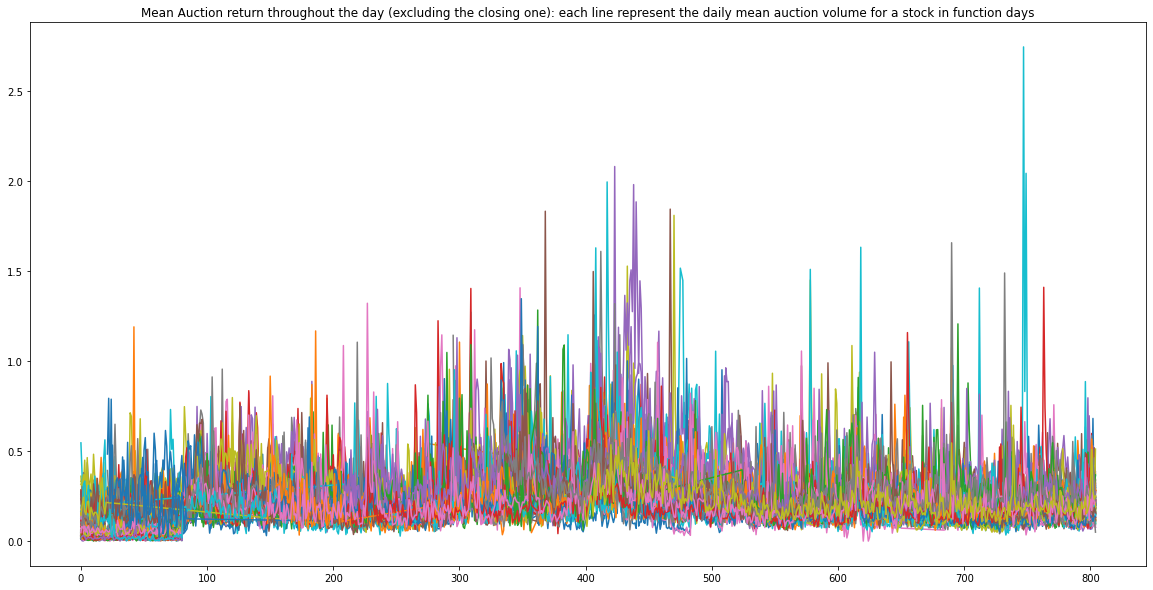

In [ ]:
# cluster 4 



# for volume
for i in data_cluster_4.pid.unique():
  data= data_cluster_4[data_cluster_4["pid"]==i]
  days= data.day
  auction_end_day=data["mean_volume_across_day"]
  plt.rcParams["figure.figsize"] = (20,10)
  plt.plot(days,auction_end_day)
  plt.title("Mean Auction Volumes throughout the day (excluding the closing one): each line represent the daily mean auction volume for a stock in function days")


plt.show()


# for return
for i in data_cluster_4.pid.unique():
  data= data_cluster_4[data_cluster_4["pid"]==i]
  days= data.day
  auction_end_day=data["mean_return_across_day"]
  plt.rcParams["figure.figsize"] = (20,10)
  plt.plot(days,auction_end_day)
  plt.title("Mean Auction return throughout the day (excluding the closing one): each line represent the daily mean auction volume for a stock in function days")


plt.show()

# second average each cluster individually and plot the 4 cluster along with time


In [ ]:
# for volume
for i in data_cluster_1.groupby('day').mean().index.values:
  data= data_cluster_1[data_cluster_1["pid"]==i]
  days= data.day
  auction_end_day=data["mean_volume_across_day"]
  plt.rcParams["figure.figsize"] = (20,10)
  plt.plot(days,auction_end_day)
  plt.title("Mean Auction Volumes throughout the day (excluding the closing one): each line represent the daily mean auction volume for a stock in function days")


plt.show()

Text(0.5, 0, 'days')

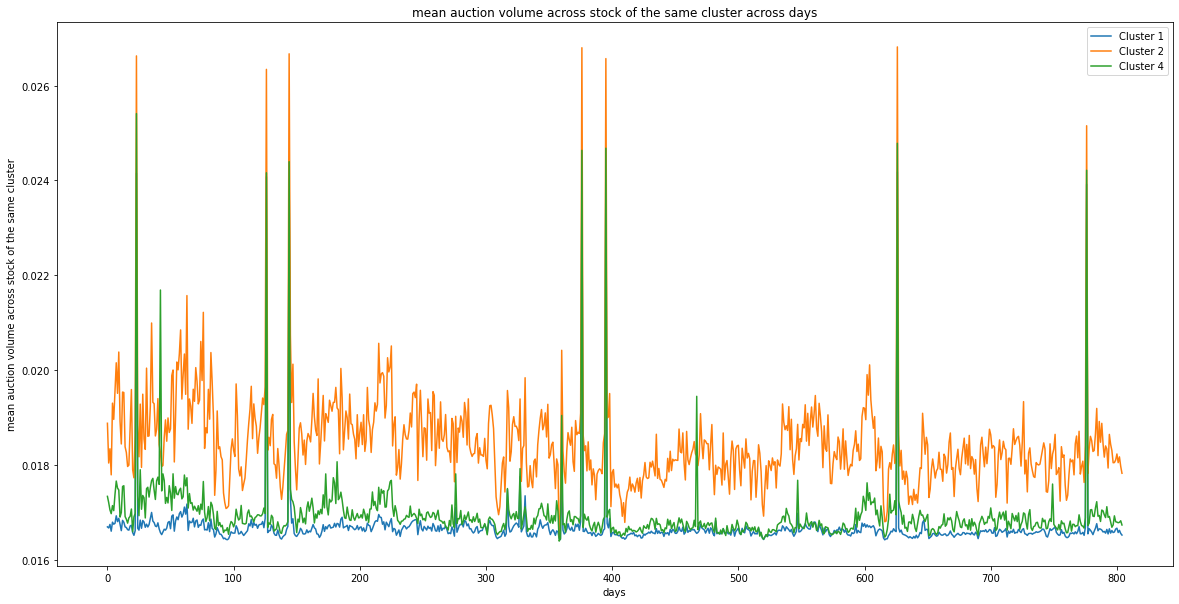

In [ ]:
plt.plot(data_cluster_1.groupby('day').mean().index.values,data_cluster_1.groupby('day').mean().mean_volume_across_day,label='Cluster 1')
plt.plot(data_cluster_2.groupby('day').mean().index.values,data_cluster_2.groupby('day').mean().mean_volume_across_day,label='Cluster 2')
#plt.plot(data_cluster_3.groupby('day').mean().index.values,data_cluster_3.groupby('day').mean().mean_volume_across_day,label='Cluster 3')
plt.plot(data_cluster_4.groupby('day').mean().index.values,data_cluster_4.groupby('day').mean().mean_volume_across_day,label='Cluster 4')
plt.legend()
plt.title("mean auction volume across stock of the same cluster across days")
plt.ylabel("mean auction volume across stock of the same cluster")
plt.xlabel("days")

Text(0.5, 0, 'days')

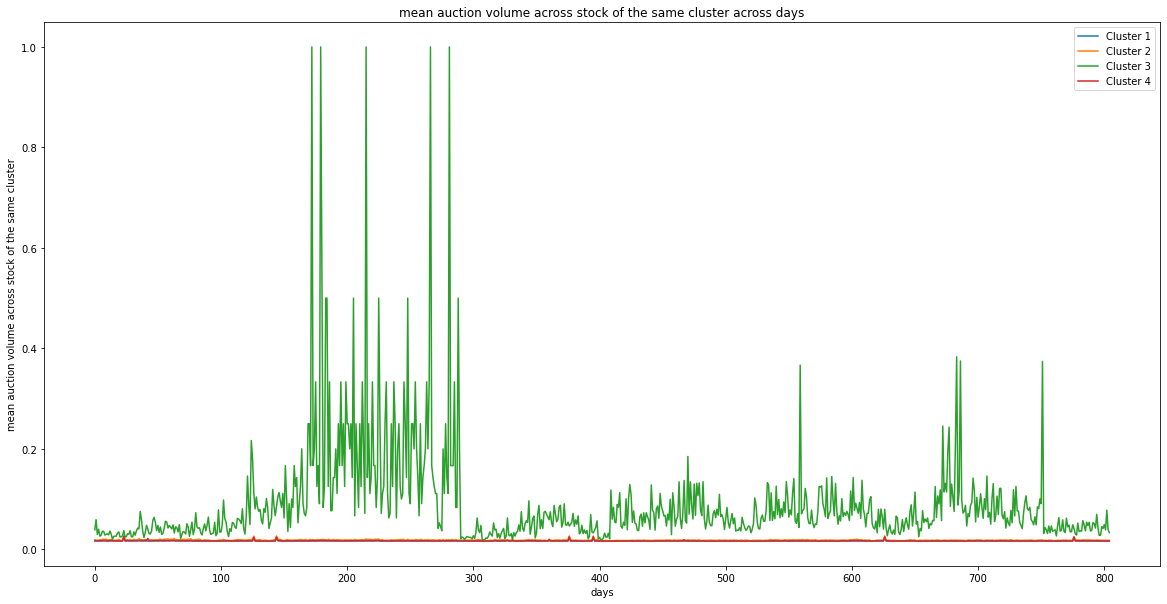

In [ ]:
plt.plot(data_cluster_1.groupby('day').mean().index.values,data_cluster_1.groupby('day').mean().mean_volume_across_day,label='Cluster 1')
plt.plot(data_cluster_2.groupby('day').mean().index.values,data_cluster_2.groupby('day').mean().mean_volume_across_day,label='Cluster 2')
plt.plot(data_cluster_3.groupby('day').mean().index.values,data_cluster_3.groupby('day').mean().mean_volume_across_day,label='Cluster 3')
plt.plot(data_cluster_4.groupby('day').mean().index.values,data_cluster_4.groupby('day').mean().mean_volume_across_day,label='Cluster 4')
plt.legend()
plt.title("mean auction volume across stock of the same cluster across days")
plt.ylabel("mean auction volume across stock of the same cluster")
plt.xlabel("days")

Text(0.5, 0, 'days')

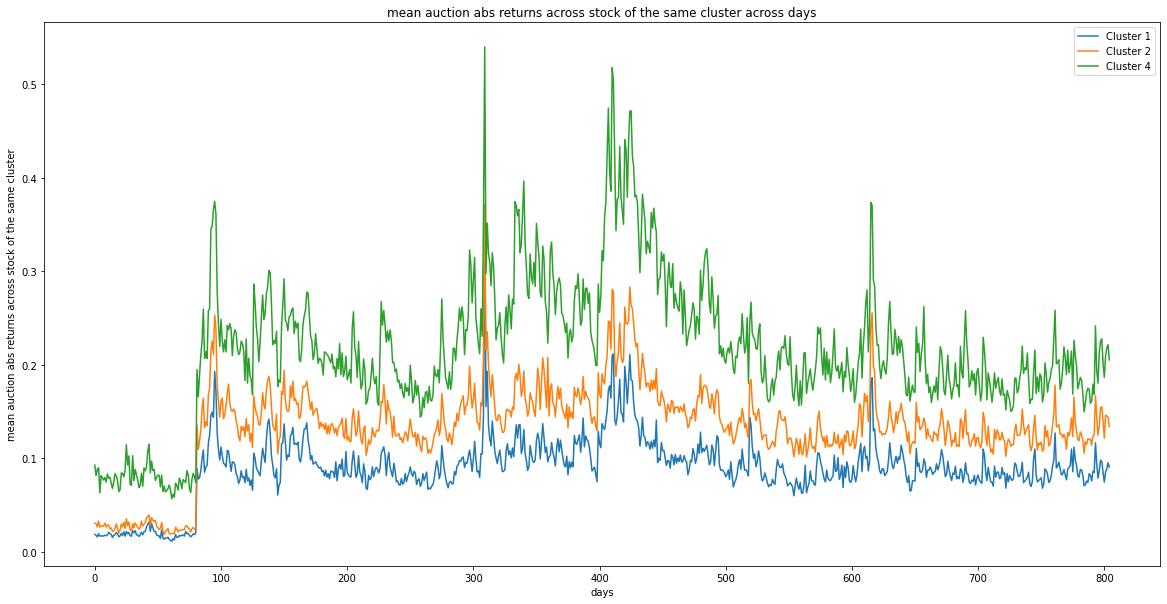

In [ ]:
plt.plot(data_cluster_1.groupby('day').mean().index.values,data_cluster_1.groupby('day').mean().mean_return_across_day,label='Cluster 1')
plt.plot(data_cluster_2.groupby('day').mean().index.values,data_cluster_2.groupby('day').mean().mean_return_across_day,label='Cluster 2')
plt.plot(data_cluster_4.groupby('day').mean().index.values,data_cluster_4.groupby('day').mean().mean_return_across_day,label='Cluster 4')
plt.legend()
plt.title("mean auction abs returns across stock of the same cluster across days")
plt.ylabel("mean auction abs returns across stock of the same cluster")
plt.xlabel("days")

Text(0.5, 0, 'days')

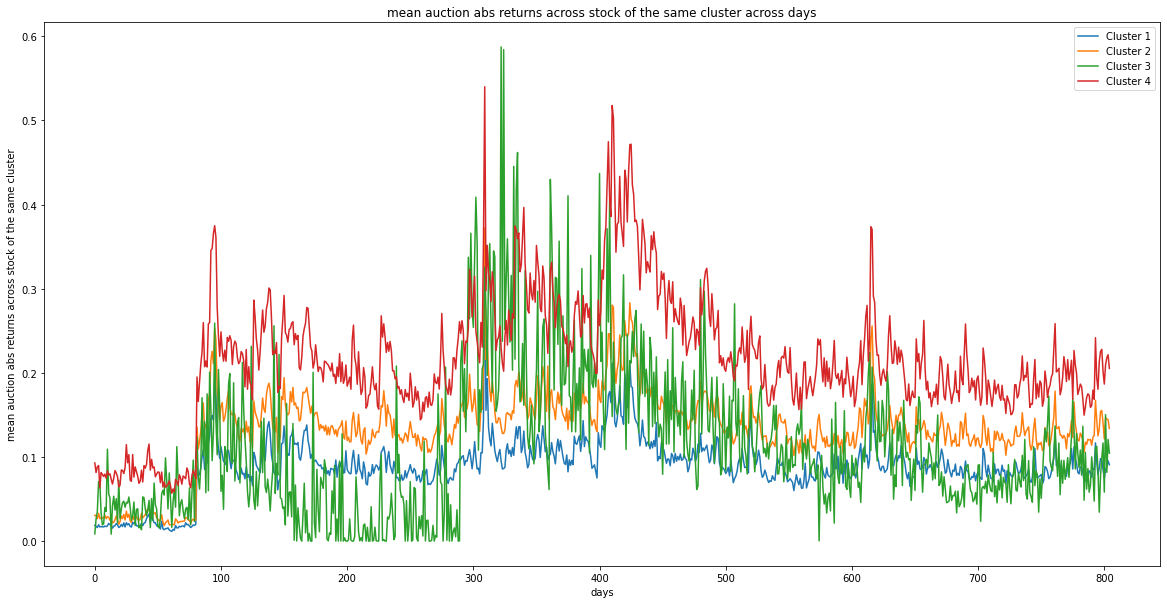

In [ ]:
plt.plot(data_cluster_1.groupby('day').mean().index.values,data_cluster_1.groupby('day').mean().mean_return_across_day,label='Cluster 1')
plt.plot(data_cluster_2.groupby('day').mean().index.values,data_cluster_2.groupby('day').mean().mean_return_across_day,label='Cluster 2')
plt.plot(data_cluster_3.groupby('day').mean().index.values,data_cluster_3.groupby('day').mean().mean_return_across_day,label='Cluster 3')
plt.plot(data_cluster_4.groupby('day').mean().index.values,data_cluster_4.groupby('day').mean().mean_return_across_day,label='Cluster 4')
plt.legend()
plt.title("mean auction abs returns across stock of the same cluster across days")
plt.ylabel("mean auction abs returns across stock of the same cluster")
plt.xlabel("days")

In [ ]:
data_cluster_1.groupby('day').mean().mean_volume_across_day

day
0      0.016693
1      0.016671
2      0.016745
3      0.016603
4      0.016792
         ...   
800    0.016666
801    0.016574
802    0.016620
803    0.016555
804    0.016521
Name: mean_volume_across_day, Length: 805, dtype: float64